Dataset loaded successfully with shape: (9994, 21)

Performing data cleaning...

Missing values before cleaning:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Removed 0 duplicate records

Cleaned data saved to 'cleaned_superstore_sales.csv'

Generating visualizations...


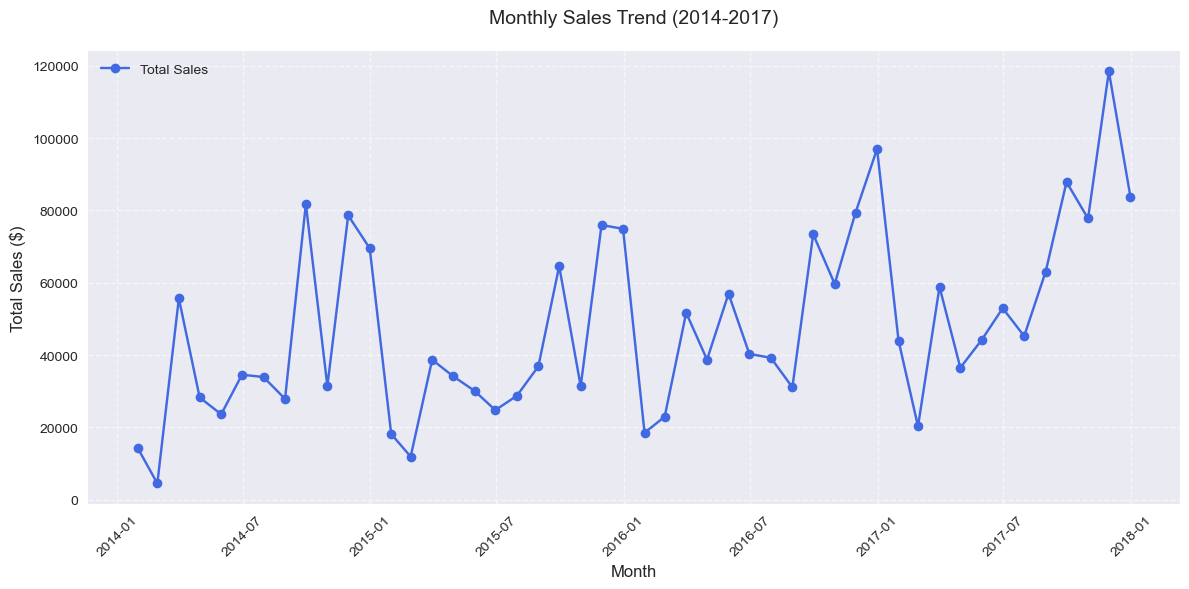

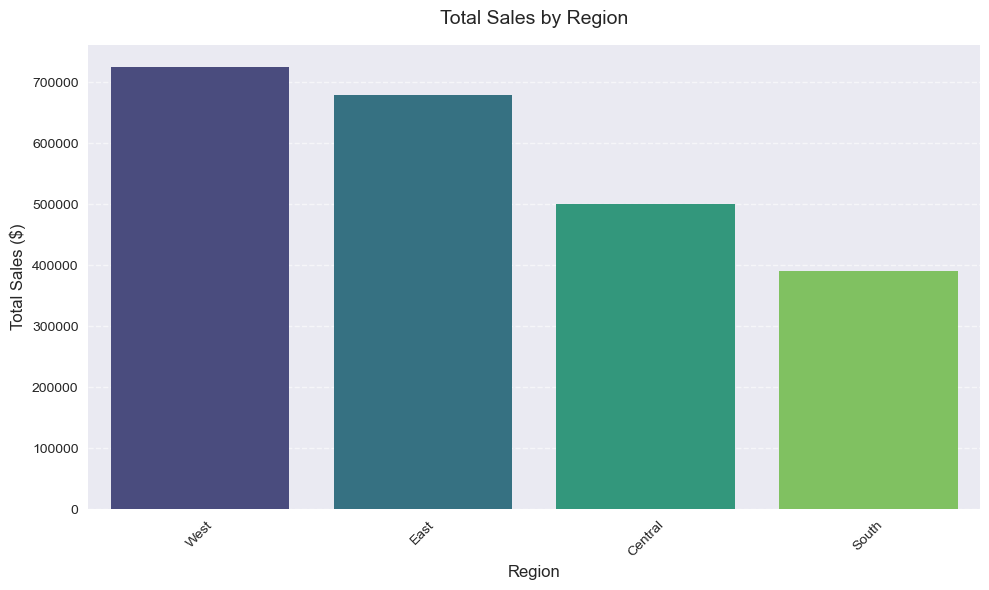

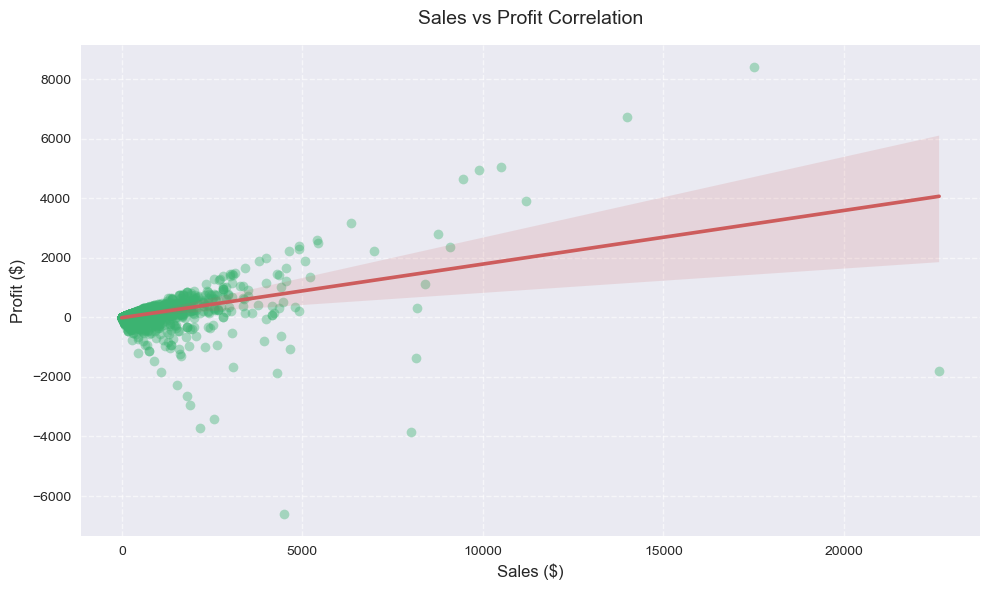

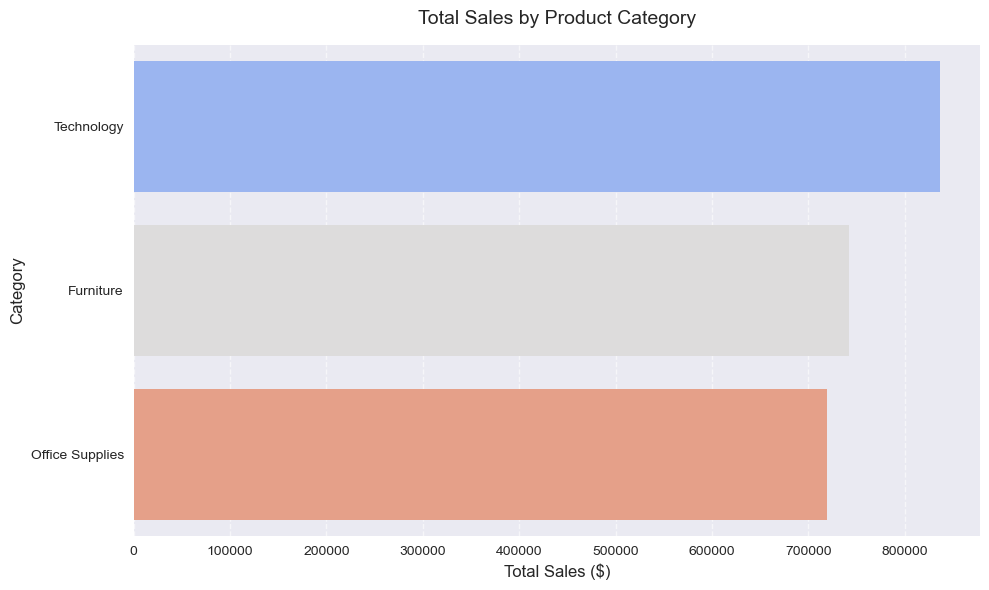


Analysis completed. Visualizations saved as PNG files.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv(r"C:\Users\Prithviraj Ghorpade\Downloads\BI_Practicles\BI2\superstore_sales.csv", encoding="ISO-8859-1")
    print("Dataset loaded successfully with shape:", df.shape)
except FileNotFoundError:
    print("Error: File 'superstore_sales.csv' not found. Please ensure it's in your working directory.")
    exit()

# Data Cleaning and Processing
print("\nPerforming data cleaning...")
# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Handle missing values
missing_values = df.isnull().sum()
print("\nMissing values before cleaning:")
print(missing_values)

df.fillna({'Sales': 0, 'Profit': 0, 'Quantity': 0}, inplace=True)
df.dropna(subset=['Order Date', 'Ship Date'], inplace=True)

# Remove duplicate records
initial_count = len(df)
df.drop_duplicates(inplace=True)
final_count = len(df)
print(f"\nRemoved {initial_count - final_count} duplicate records")

# Save cleaned data
df.to_csv("cleaned_superstore_sales.csv", index=False)
print("\nCleaned data saved to 'cleaned_superstore_sales.csv'")

# Data Visualization
plt.style.use('seaborn-v0_8')  # Updated style to avoid deprecation warning
print("\nGenerating visualizations...")

# 1. Sales Trend Over Time (Monthly)
plt.figure(figsize=(12, 6))
df_monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()
plt.plot(df_monthly_sales.index, df_monthly_sales, 
         marker='o', linestyle='-', color='royalblue', label='Total Sales')

plt.title('Monthly Sales Trend (2014-2017)', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig('monthly_sales_trend.png', dpi=300)
plt.show()

# 2. Sales by Region - Fixed Version
plt.figure(figsize=(10, 6))
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Create the barplot without problematic parameters
ax = sns.barplot(
    x=region_sales.index, 
    y=region_sales.values, 
    palette='viridis'
)

plt.title('Total Sales by Region', fontsize=14, pad=15)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('sales_by_region.png', dpi=300)
plt.show()

# 3. Sales vs Profit Scatter Plot with Trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='Sales', y='Profit', data=df, 
            scatter_kws={'alpha':0.4, 'color':'mediumseagreen'},
            line_kws={'color':'indianred'})

plt.title('Sales vs Profit Correlation', fontsize=14, pad=15)
plt.xlabel('Sales ($)', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('sales_profit_correlation.png', dpi=300)
plt.show()

# 4. Sales by Product Category - Fixed Version
plt.figure(figsize=(10, 6))
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Create horizontal bar plot without hue parameter
ax = sns.barplot(
    x=category_sales.values,
    y=category_sales.index,
    palette='coolwarm'
)

plt.title('Total Sales by Product Category', fontsize=14, pad=15)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('sales_by_category.png', dpi=300)
plt.show()

print("\nAnalysis completed. Visualizations saved as PNG files.")